# Partial Dependence Plots

In [3]:
# !pip install scikit-learn==1.0.1

In [1]:
import sklearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.inspection import PartialDependenceDisplay

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.1.


## Collect the dataset

In [3]:
cal_housing = fetch_california_housing()

In [4]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
X = cal_housing.data
y = cal_housing.target
cal_features = cal_housing.feature_names

df = pd.concat((pd.DataFrame(X, columns=cal_features),
                pd.DataFrame({'MedianHouseVal': y})), axis=1)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Train an MLP model 

In [7]:
# Create models
mlp_reg = MLPRegressor(hidden_layer_sizes=[30, 20, 10],
                       max_iter=500)

# Create pipeline
transformer = ColumnTransformer([
    ('numerical', MinMaxScaler(feature_range=(-1,1)), cal_features),
])

mlp_pipeline = Pipeline(steps=[
    ('transform', transformer),
    ('model', mlp_reg)
])

# Create dataset
X_train, X_test, y_train, y_test = train_test_split(df[cal_features], y, test_size=0.2)

mlp_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical',
                                                  MinMaxScaler(feature_range=(-1,
                                                                              1)),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('model',
                 MLPRegressor(hidden_layer_sizes=[30, 20, 10], max_iter=500))])

In [8]:
def compute_rmse(preds, labels):
    return np.sqrt(np.mean((preds - labels)**2))

In [9]:
model_rmse_error = compute_rmse(mlp_pipeline.predict(X_test), y_test)
print(f'Root mean squared error of MLP model: {model_rmse_error}')

Root mean squared error of MLP model: 0.6113827664099325


Let's look at the partial dependence plot for the features `MedInc'

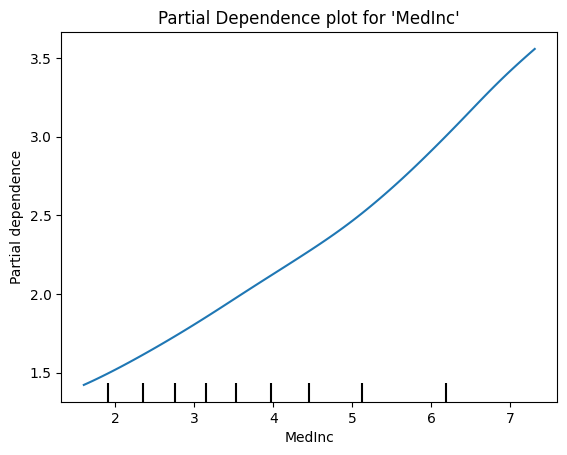

In [10]:
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=['MedInc']
)
plt.title("Partial Dependence plot for 'MedInc'")
plt.show()

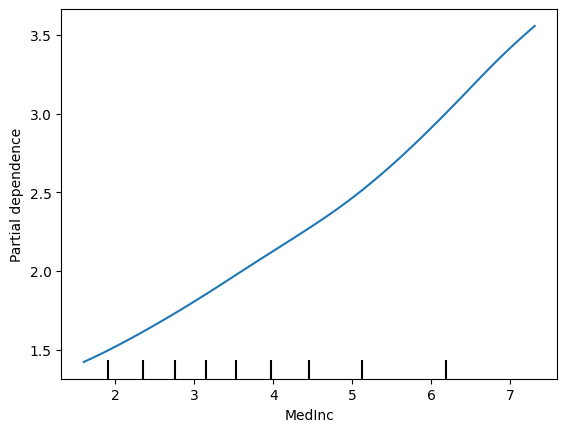

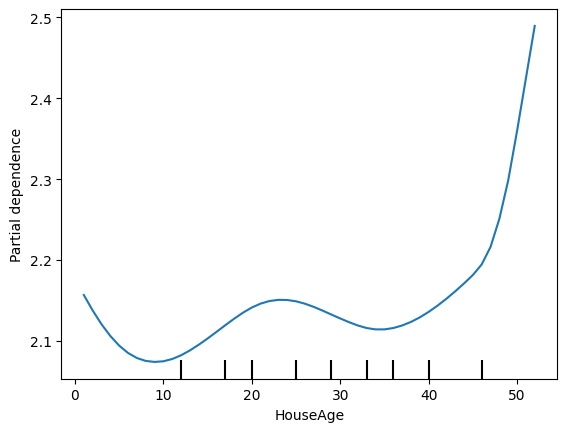

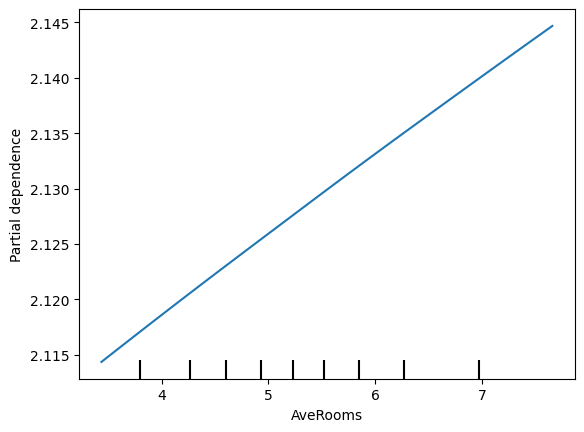

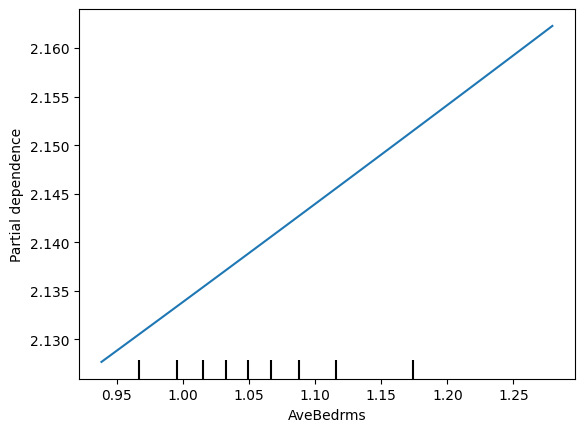

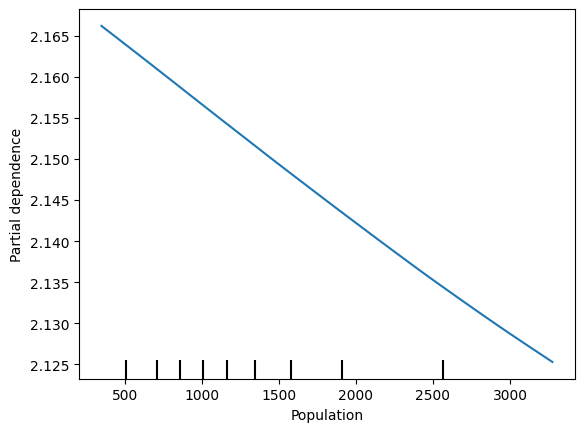

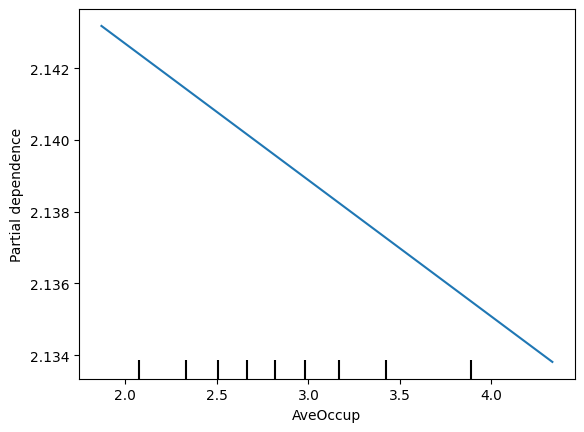

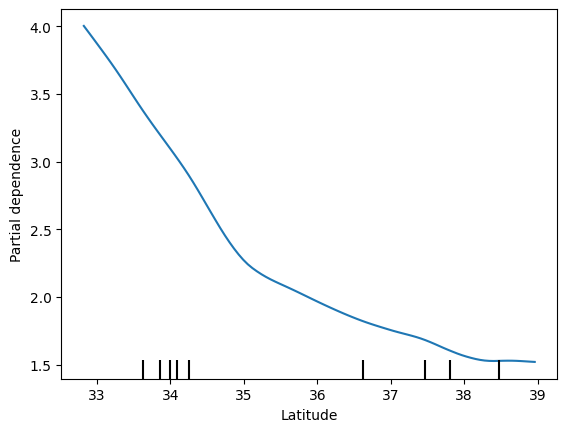

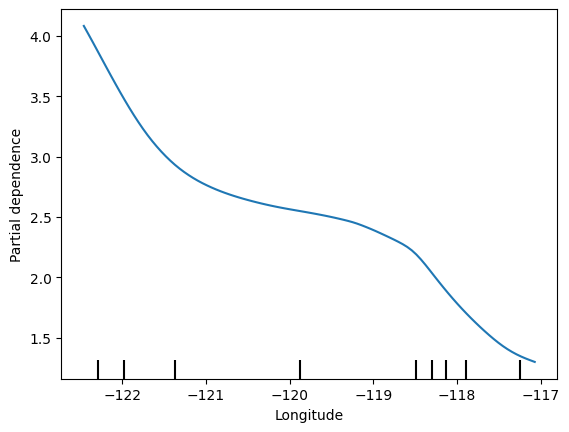

In [11]:
for feature in cal_features:
    PartialDependenceDisplay.from_estimator(
        mlp_pipeline, X_train, features=[feature])

## Compare two features interaction


In [37]:
from scipy.stats import pearsonr
corr_coeff = pearsonr(df['MedInc'], df['AveRooms'])[0]
print(f'Pearson correlation coeff: {corr_coeff}')

Pearson correlation coeff: 0.32689543164129564


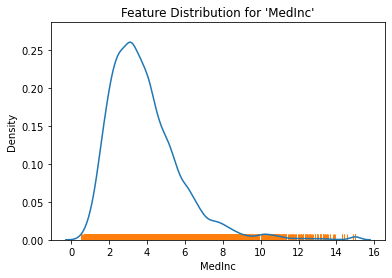

In [38]:
sns.kdeplot(x=df['MedInc'])
sns.rugplot(x=df['MedInc'])
plt.title("Feature Distribution for 'MedInc'")
plt.show()

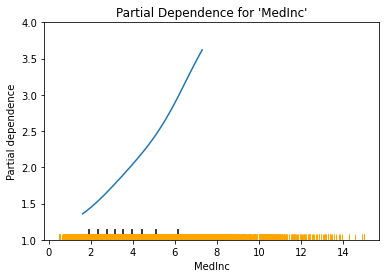

In [44]:
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=['MedInc'])
sns.rugplot(data=X_train, x='MedInc', color='orange')
plt.title("Partial Dependence for 'MedInc'")
plt.ylim(1, 4)
plt.show()

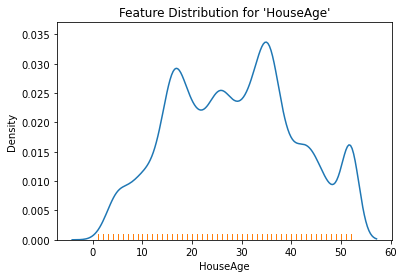

In [50]:
sns.kdeplot(x=df['HouseAge'])
sns.rugplot(x=df['HouseAge'])
plt.title("Feature Distribution for 'HouseAge'")
plt.show()

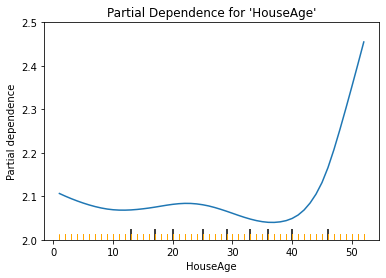

In [53]:
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=['HouseAge'])
sns.rugplot(data=X_train, x='HouseAge', color='orange')
plt.title("Partial Dependence for 'HouseAge'")
plt.ylim(2, 2.5)
plt.show()

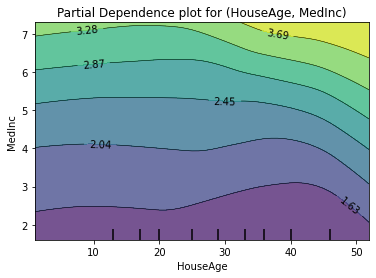

In [55]:
PartialDependenceDisplay.from_estimator(
    mlp_pipeline, X_train, features=[('HouseAge', 'MedInc')])
plt.title('Partial Dependence plot for (HouseAge, MedInc)')
plt.show()

## For Classification Task

We'll use the heart risk dataset.

In [12]:
import tensorflow as tf
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [13]:
print(f'The tensorflow version is {tf.__version__}.')

The tensorflow version is 2.11.0.


In [14]:
csv_file = tf.keras.utils.get_file(
    'heart.csv', 'http://storage.googleapis.com/download.tensorflow.org/data/heart.csv')
df = pd.read_csv(csv_file)

13273/13273 [==============================] - 0s 0us/step


In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [16]:
df.FastingBS = df.fbs.apply(lambda x: 'T' if x==1 else 'F')

C:\Users\lgarzia\AppData\Local\Temp\ipykernel_10628\141009999.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.FastingBS = df.fbs.apply(lambda x: 'T' if x==1 else 'F')


In [17]:
# Categorical variables
cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Numerical Variables
num_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X = df[num_vars + cat_vars]

# Label
y = df['target']

In [18]:
# Create dataset
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create models
gb_clf = GradientBoostingClassifier(
    n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0
)

# Create pipeline
transformer = ColumnTransformer([
    ('numerical', StandardScaler(), num_vars),
    ('categorical', OneHotEncoder(), cat_vars),
])

clf_pipeline = Pipeline(steps=[
    ('transform', transformer),
    ('classifier', gb_clf)
])

clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=1.0, max_depth=1,
                                            random_state=0))])

In [20]:
clf_pipeline.score(X_test, y_test)

0.7377049180327869

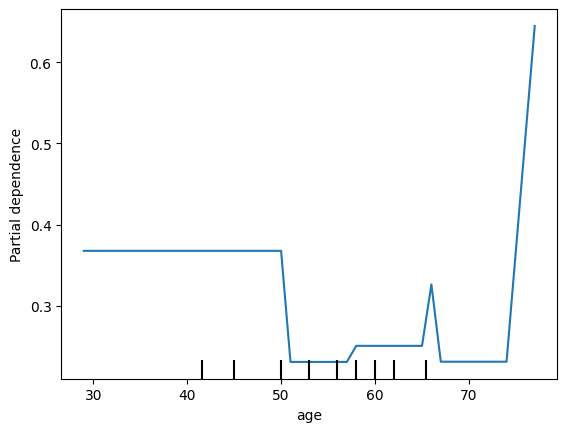

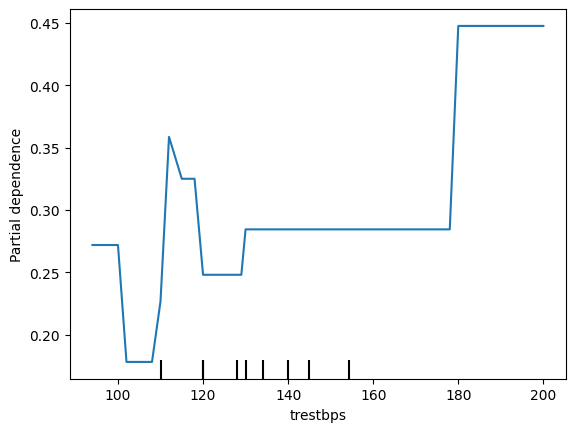

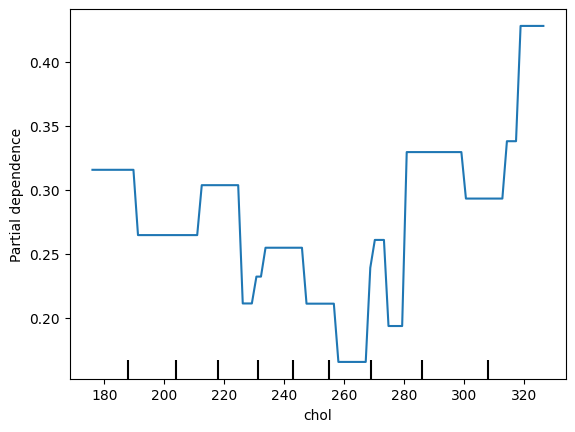

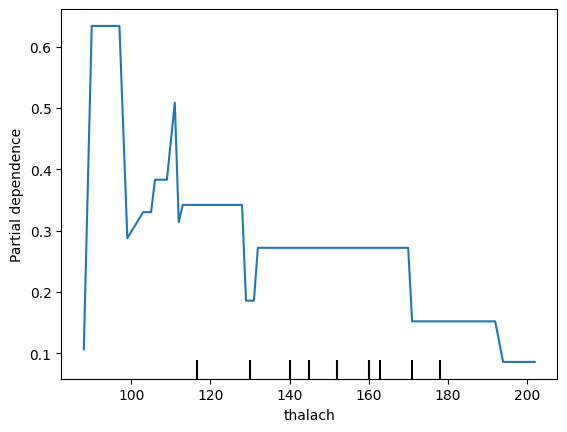

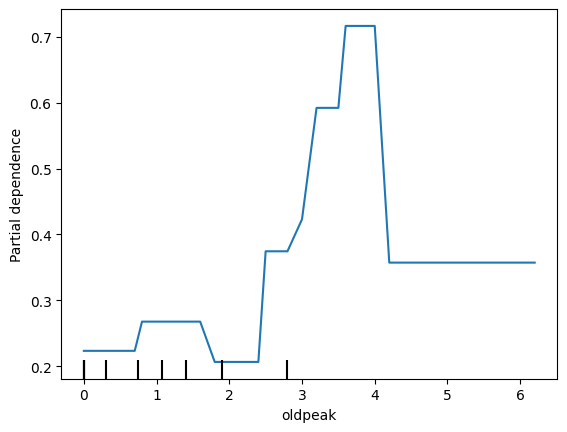

In [21]:
for feature in num_vars:
    PartialDependenceDisplay.from_estimator(clf_pipeline, X_train, features=[feature])

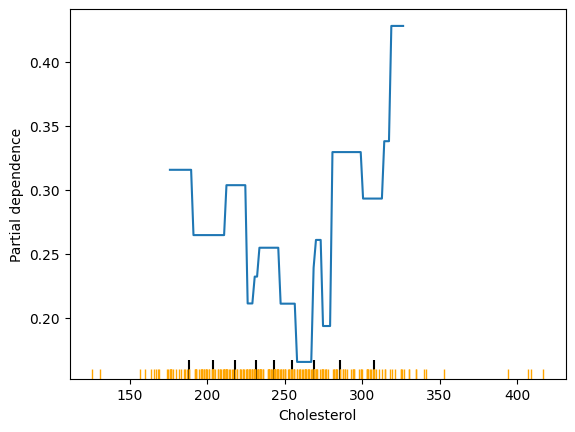

In [22]:
age_pdp = PartialDependenceDisplay.from_estimator(clf_pipeline, X_train, features=['chol'])
age_rug = sns.rugplot(data=X_train, x='chol', color='orange')
plt.xlabel('Cholesterol')
plt.show()

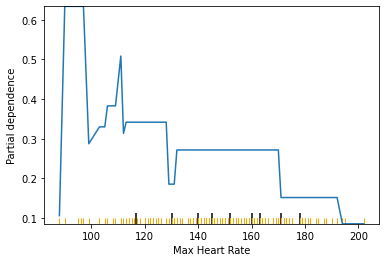

In [84]:
age_pdp = PartialDependenceDisplay.from_estimator(clf_pipeline, X_train, features=['thalach'])
age_rug = sns.rugplot(data=X_train, x='thalach', color='orange')
plt.xlabel("Max Heart Rate")
plt.show()

### Dealing with Categorical Features

First for the sex feature

In [89]:
# first for 'M'
X_pdp = X.copy()
X_pdp['Sex'] = ['M']*X_pdp.shape[0]
print(clf_pipeline.predict(X_pdp).mean())

0.27722772277227725


In [91]:
cat_pdp_dict = {}
for cat_var in cat_vars:
    feature_pdp_dict = {}
    feature_vals = X_train[cat_var].unique()
    for feature_val in feature_vals:
        X_pdp = X_train.copy()
        X_pdp[cat_var] = [feature_val]*X_pdp.shape[0]
        feature_pdp_dict[feature_val] = clf_pipeline.predict(X_pdp).mean()
    cat_pdp_dict[cat_var] = feature_pdp_dict

In [92]:
cat_pdp_dict

{'sex': {0: 0.22727272727272727, 1: 0.26859504132231404},
 'cp': {4: 0.28512396694214875,
  3: 0.2396694214876033,
  2: 0.2396694214876033,
  1: 0.2396694214876033,
  0: 0.028925619834710745},
 'fbs': {0: 0.24793388429752067, 1: 0.3512396694214876},
 'restecg': {2: 0.26859504132231404,
  0: 0.24793388429752067,
  1: 0.24793388429752067},
 'exang': {0: 0.26859504132231404, 1: 0.26859504132231404},
 'slope': {1: 0.23553719008264462,
  2: 0.2768595041322314,
  3: 0.2768595041322314},
 'ca': {0: 0.14049586776859505,
  2: 0.4214876033057851,
  1: 0.3140495867768595,
  3: 0.371900826446281},
 'thal': {'normal': 0.16942148760330578,
  'reversible': 0.3305785123966942,
  'fixed': 0.3305785123966942,
  '1': 0.05785123966942149,
  '2': 0.3305785123966942}}

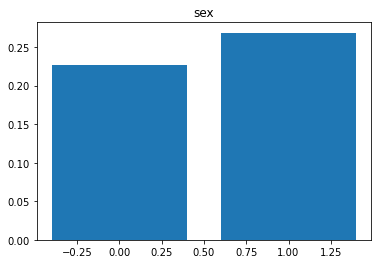

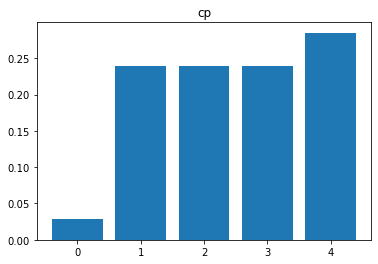

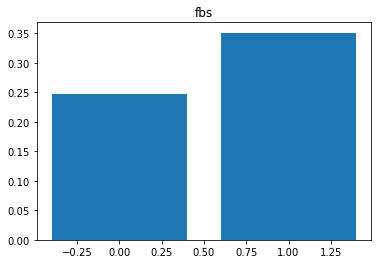

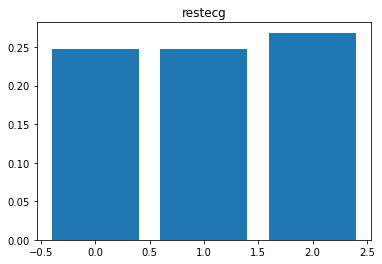

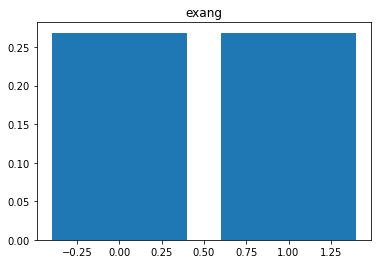

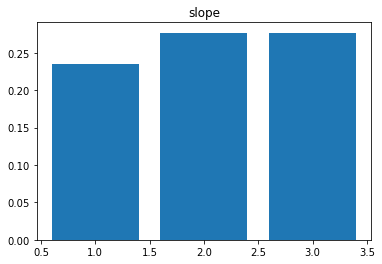

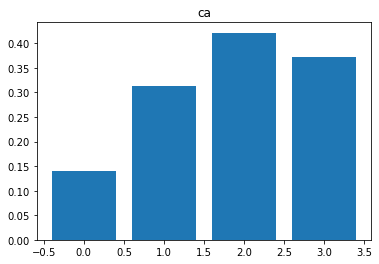

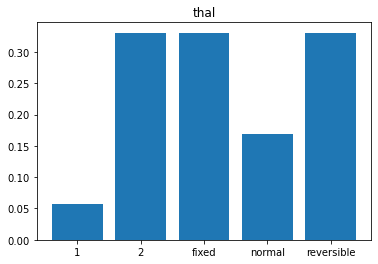

In [93]:
for cat_var in cat_vars:
    plt.bar(*zip(*sorted(cat_pdp_dict[cat_var].items())))
    plt.title(cat_var)
    plt.show()

## Working with Multi-Class classification

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

In [24]:
# To download the dataset.
!wget http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip
!unzip winequality.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open winequality.zip, winequality.zip.zip or winequality.zip.ZIP.


In [25]:
df = pd.read_csv("./winequality/winequality-red.csv", sep=';')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './winequality/winequality-red.csv'

In [96]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [97]:
numeric = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

X = df[numeric]
y = df['quality']

In [103]:
multi_clf = OneVsRestClassifier(
    MLPClassifier(
        hidden_layer_sizes=[256, 128, 64, 32],
        max_iter=750)
    ).fit(X, y)

# Create pipeline
transformer = ColumnTransformer([
    ('numerical', StandardScaler(), numeric),
])


multi_clf_pipeline = Pipeline(steps=[
    ('transform', transformer),
    ('classifier', multi_clf)
])

In [106]:
multi_clf_pipeline.fit(X, y)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('classifier',
                 OneVsRestClassifier(estimator=MLPClassifier(hidden_layer_sizes=[256,
                                                                                 128,
                                                   

In [107]:
multi_clf_pipeline.score(X, y)

0.99812382739212

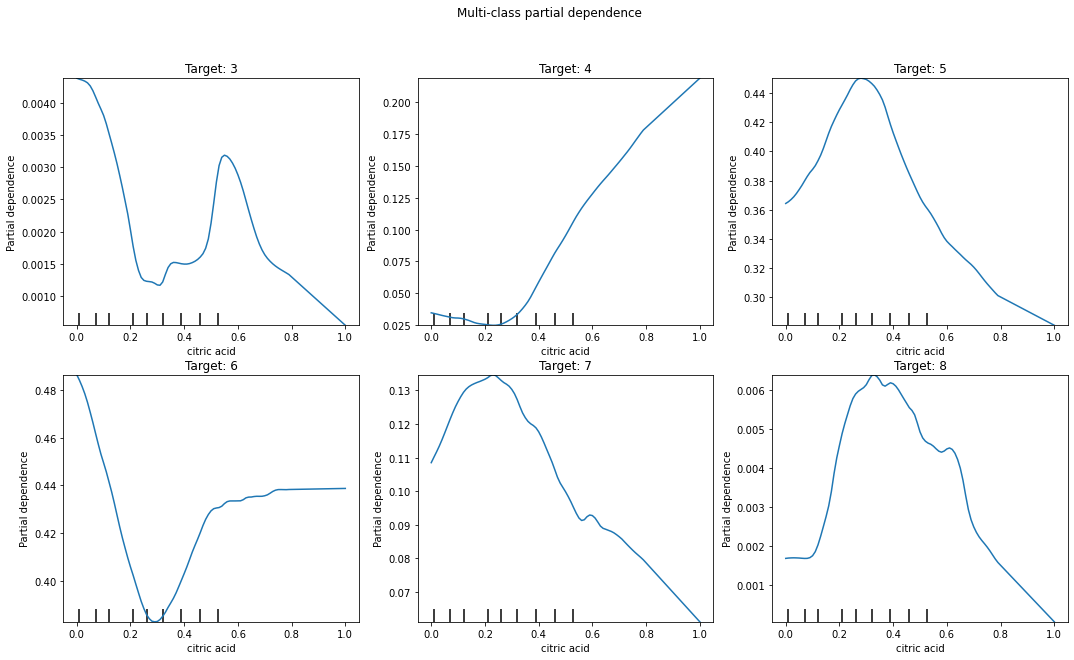

In [108]:
fig, ((ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Multi-class partial dependence')

target3_disp = PartialDependenceDisplay.from_estimator(
    multi_clf_pipeline, X, features=['citric acid'], target=3, ax=ax3)
target4_disp = PartialDependenceDisplay.from_estimator(
    multi_clf_pipeline, X, features=['citric acid'], target=4, ax=ax4)
target5_disp = PartialDependenceDisplay.from_estimator(
    multi_clf_pipeline, X, features=['citric acid'], target=5, ax=ax5)
target6_disp = PartialDependenceDisplay.from_estimator(
    multi_clf_pipeline, X, features=['citric acid'], target=6, ax=ax6)
target7_disp = PartialDependenceDisplay.from_estimator(
    multi_clf_pipeline, X, features=['citric acid'], target=7, ax=ax7)
target8_disp = PartialDependenceDisplay.from_estimator(
    multi_clf_pipeline, X, features=['citric acid'], target=8, ax=ax8)

ax3.set_title("Target: 3")
ax4.set_title("Target: 4")
ax5.set_title("Target: 5")
ax6.set_title("Target: 6")
ax7.set_title("Target: 7")
ax8.set_title("Target: 8")
plt.show()

Copyright 2022 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License